In [1]:
import pandas as pd 
import numpy as np
data=pd.read_csv('data_4.csv')

In [2]:
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
#define x and y
X=data.drop(['labels'],axis=1)
y=data.loc[:,'labels']#drop 掉前面所有的，只保留y,保留所有行
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [4]:
pd.value_counts(y)#查看y里面有几种类别

2    1156
1     954
0     890
Name: labels, dtype: int64

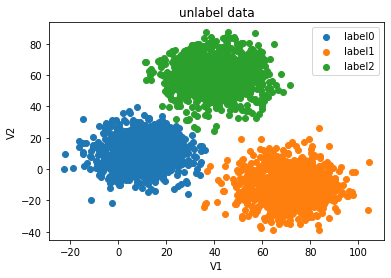

In [5]:
#把数据可视化
%matplotlib inline
from matplotlib import pyplot as plt
fig1 =plt.figure()
label0=plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1=plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2=plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.title("unlabel data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()


In [6]:
#看一下X和Y的维度
print(X.shape,y.shape)

(3000, 2) (3000,)


In [7]:
#建立一个K-means 模型
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

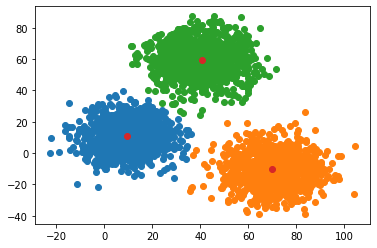

In [8]:
#找聚类的中心点
centers=KM.cluster_centers_
fig3=plt.figure()
label0=plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1=plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2=plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [9]:
#test data: V1=80,V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[1]


In [10]:
#predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))

1    1149
0     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [11]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predict)
print(accuracy)

0.0023333333333333335


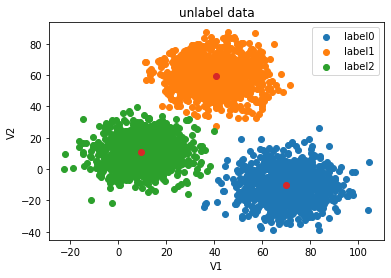

In [12]:
#visualize the data and result
fig4 =plt.figure()
label0=plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1=plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2=plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])
plt.title("unlabel data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [13]:
#矫正结果
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(1)
    elif i== 1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
    print(pd.value_counts(y_corrected))

0    1
dtype: int64
0    2
dtype: int64
0    3
dtype: int64
0    4
dtype: int64
0    5
dtype: int64
0    6
dtype: int64
0    7
dtype: int64
0    8
dtype: int64
0    9
dtype: int64
0    10
dtype: int64
0    11
dtype: int64
0    12
dtype: int64
0    13
dtype: int64
0    14
dtype: int64
0    15
dtype: int64
0    16
dtype: int64
0    17
dtype: int64
0    18
dtype: int64
0    19
dtype: int64
0    20
dtype: int64
0    21
dtype: int64
0    22
dtype: int64
0    23
dtype: int64
0    24
dtype: int64
0    25
dtype: int64
0    26
dtype: int64
0    27
dtype: int64
0    28
dtype: int64
0    29
dtype: int64
0    29
2     1
dtype: int64
0    30
2     1
dtype: int64
0    31
2     1
dtype: int64
0    32
2     1
dtype: int64
0    33
2     1
dtype: int64
0    34
2     1
dtype: int64
0    35
2     1
dtype: int64
0    36
2     1
dtype: int64
0    37
2     1
dtype: int64
0    38
2     1
dtype: int64
0    39
2     1
dtype: int64
0    40
2     1
dtype: int64
0    41
2     1
dtype: int64
0    42
2     1
dtype: 

dtype: int64
0    335
2      2
dtype: int64
0    336
2      2
dtype: int64
0    337
2      2
dtype: int64
0    338
2      2
dtype: int64
0    339
2      2
dtype: int64
0    340
2      2
dtype: int64
0    341
2      2
dtype: int64
0    342
2      2
dtype: int64
0    343
2      2
dtype: int64
0    344
2      2
dtype: int64
0    345
2      2
dtype: int64
0    346
2      2
dtype: int64
0    347
2      2
dtype: int64
0    348
2      2
dtype: int64
0    349
2      2
dtype: int64
0    350
2      2
dtype: int64
0    351
2      2
dtype: int64
0    352
2      2
dtype: int64
0    353
2      2
dtype: int64
0    354
2      2
dtype: int64
0    355
2      2
dtype: int64
0    356
2      2
dtype: int64
0    357
2      2
dtype: int64
0    358
2      2
dtype: int64
0    359
2      2
dtype: int64
0    360
2      2
dtype: int64
0    361
2      2
dtype: int64
0    362
2      2
dtype: int64
0    363
2      2
dtype: int64
0    364
2      2
dtype: int64
0    365
2      2
dtype: int64
0    366
2      2
dtype: i

0    795
1      2
2      2
dtype: int64
0    796
1      2
2      2
dtype: int64
0    797
1      2
2      2
dtype: int64
0    798
1      2
2      2
dtype: int64
0    799
1      2
2      2
dtype: int64
0    800
1      2
2      2
dtype: int64
0    801
1      2
2      2
dtype: int64
0    802
1      2
2      2
dtype: int64
0    803
1      2
2      2
dtype: int64
0    804
1      2
2      2
dtype: int64
0    805
1      2
2      2
dtype: int64
0    806
1      2
2      2
dtype: int64
0    807
1      2
2      2
dtype: int64
0    808
1      2
2      2
dtype: int64
0    809
1      2
2      2
dtype: int64
0    810
1      2
2      2
dtype: int64
0    811
1      2
2      2
dtype: int64
0    812
1      2
2      2
dtype: int64
0    813
1      2
2      2
dtype: int64
0    814
1      2
2      2
dtype: int64
0    815
1      2
2      2
dtype: int64
0    816
1      2
2      2
dtype: int64
0    817
1      2
2      2
dtype: int64
0    818
1      2
2      2
dtype: int64
0    819
1      2
2      2
dtype: int64


0    897
2    152
1      2
dtype: int64
0    897
2    153
1      2
dtype: int64
0    897
2    154
1      2
dtype: int64
0    897
2    155
1      2
dtype: int64
0    897
2    156
1      2
dtype: int64
0    897
2    157
1      2
dtype: int64
0    897
2    158
1      2
dtype: int64
0    897
2    159
1      2
dtype: int64
0    897
2    160
1      2
dtype: int64
0    897
2    161
1      2
dtype: int64
0    897
2    162
1      2
dtype: int64
0    897
2    163
1      2
dtype: int64
0    897
2    164
1      2
dtype: int64
0    897
2    165
1      2
dtype: int64
0    897
2    166
1      2
dtype: int64
0    897
2    167
1      2
dtype: int64
0    897
2    168
1      2
dtype: int64
0    897
2    169
1      2
dtype: int64
0    897
2    170
1      2
dtype: int64
0    897
2    171
1      2
dtype: int64
0    897
2    172
1      2
dtype: int64
0    897
2    173
1      2
dtype: int64
0    897
2    174
1      2
dtype: int64
0    897
2    175
1      2
dtype: int64
0    897
2    176
1      2
dtype: int64


0    897
2    361
1      2
dtype: int64
0    897
2    362
1      2
dtype: int64
0    897
2    363
1      2
dtype: int64
0    897
2    364
1      2
dtype: int64
0    897
2    365
1      2
dtype: int64
0    897
2    366
1      2
dtype: int64
0    897
2    367
1      2
dtype: int64
0    897
2    368
1      2
dtype: int64
0    897
2    369
1      2
dtype: int64
0    897
2    370
1      2
dtype: int64
0    897
2    371
1      2
dtype: int64
0    897
2    372
1      2
dtype: int64
0    897
2    373
1      2
dtype: int64
0    897
2    374
1      2
dtype: int64
0    897
2    375
1      2
dtype: int64
0    897
2    376
1      2
dtype: int64
0    897
2    377
1      2
dtype: int64
0    897
2    378
1      2
dtype: int64
0    897
2    379
1      2
dtype: int64
0    897
2    380
1      2
dtype: int64
0    897
2    381
1      2
dtype: int64
0    897
2    382
1      2
dtype: int64
0    897
2    383
1      2
dtype: int64
0    897
2    384
1      2
dtype: int64
0    897
2    385
1      2
dtype: int64


dtype: int64
0    898
2    581
1      2
dtype: int64
0    898
2    582
1      2
dtype: int64
0    898
2    583
1      2
dtype: int64
0    898
2    584
1      2
dtype: int64
0    898
2    585
1      2
dtype: int64
0    898
2    586
1      2
dtype: int64
0    898
2    587
1      2
dtype: int64
0    898
2    588
1      2
dtype: int64
0    898
2    589
1      2
dtype: int64
0    898
2    590
1      2
dtype: int64
0    898
2    591
1      2
dtype: int64
0    898
2    592
1      2
dtype: int64
0    898
2    593
1      2
dtype: int64
0    898
2    594
1      2
dtype: int64
0    898
2    595
1      2
dtype: int64
0    898
2    596
1      2
dtype: int64
0    898
2    597
1      2
dtype: int64
0    898
2    598
1      2
dtype: int64
0    898
2    599
1      2
dtype: int64
0    898
2    600
1      2
dtype: int64
0    898
2    601
1      2
dtype: int64
0    898
2    602
1      2
dtype: int64
0    898
2    603
1      2
dtype: int64
0    898
2    604
1      2
dtype: int64
0    898
2    605
1      2


0    899
2    802
1      2
dtype: int64
0    899
2    803
1      2
dtype: int64
0    899
2    804
1      2
dtype: int64
0    899
2    805
1      2
dtype: int64
0    899
2    806
1      2
dtype: int64
0    899
2    807
1      2
dtype: int64
0    899
2    808
1      2
dtype: int64
0    899
2    809
1      2
dtype: int64
0    899
2    810
1      2
dtype: int64
0    899
2    811
1      2
dtype: int64
0    899
2    812
1      2
dtype: int64
0    899
2    813
1      2
dtype: int64
0    899
2    814
1      2
dtype: int64
0    899
2    815
1      2
dtype: int64
0    899
2    816
1      2
dtype: int64
0    899
2    817
1      2
dtype: int64
0    899
2    818
1      2
dtype: int64
0    899
2    819
1      2
dtype: int64
0    899
2    820
1      2
dtype: int64
0    899
2    821
1      2
dtype: int64
0    899
2    822
1      2
dtype: int64
0    899
2    823
1      2
dtype: int64
0    899
2    824
1      2
dtype: int64
0    899
2    825
1      2
dtype: int64
0    899
2    826
1      2
dtype: int64


2    1017
0     899
1       2
dtype: int64
2    1018
0     899
1       2
dtype: int64
2    1019
0     899
1       2
dtype: int64
2    1020
0     899
1       2
dtype: int64
2    1021
0     899
1       2
dtype: int64
2    1022
0     899
1       2
dtype: int64
2    1023
0     899
1       2
dtype: int64
2    1024
0     899
1       2
dtype: int64
2    1025
0     899
1       2
dtype: int64
2    1026
0     899
1       2
dtype: int64
2    1027
0     899
1       2
dtype: int64
2    1028
0     899
1       2
dtype: int64
2    1029
0     899
1       2
dtype: int64
2    1030
0     899
1       2
dtype: int64
2    1031
0     899
1       2
dtype: int64
2    1032
0     899
1       2
dtype: int64
2    1033
0     899
1       2
dtype: int64
2    1034
0     899
1       2
dtype: int64
2    1035
0     899
1       2
dtype: int64
2    1036
0     899
1       2
dtype: int64
2    1037
0     899
1       2
dtype: int64
2    1038
0     899
1       2
dtype: int64
2    1039
0     899
1       2
dtype: int64
2    1040
0

2    1149
0     899
1      67
dtype: int64
2    1149
0     899
1      68
dtype: int64
2    1149
0     899
1      69
dtype: int64
2    1149
0     899
1      70
dtype: int64
2    1149
0     899
1      71
dtype: int64
2    1149
0     899
1      72
dtype: int64
2    1149
0     899
1      73
dtype: int64
2    1149
0     899
1      74
dtype: int64
2    1149
0     899
1      75
dtype: int64
2    1149
0     899
1      76
dtype: int64
2    1149
0     899
1      77
dtype: int64
2    1149
0     899
1      78
dtype: int64
2    1149
0     899
1      79
dtype: int64
2    1149
0     899
1      80
dtype: int64
2    1149
0     899
1      81
dtype: int64
2    1149
0     899
1      82
dtype: int64
2    1149
0     899
1      83
dtype: int64
2    1149
0     899
1      84
dtype: int64
2    1149
0     899
1      85
dtype: int64
2    1149
0     899
1      86
dtype: int64
2    1149
0     899
1      87
dtype: int64
2    1149
0     899
1      88
dtype: int64
2    1149
0     899
1      89
dtype: int64
2    1149
0

2    1149
0     899
1     263
dtype: int64
2    1149
0     899
1     264
dtype: int64
2    1149
0     899
1     265
dtype: int64
2    1149
0     899
1     266
dtype: int64
2    1149
0     899
1     267
dtype: int64
2    1149
0     899
1     268
dtype: int64
2    1149
0     899
1     269
dtype: int64
2    1149
0     899
1     270
dtype: int64
2    1149
0     899
1     271
dtype: int64
2    1149
0     899
1     272
dtype: int64
2    1149
0     899
1     273
dtype: int64
2    1149
0     899
1     274
dtype: int64
2    1149
0     899
1     275
dtype: int64
2    1149
0     899
1     276
dtype: int64
2    1149
0     899
1     277
dtype: int64
2    1149
0     899
1     278
dtype: int64
2    1149
0     899
1     279
dtype: int64
2    1149
0     899
1     280
dtype: int64
2    1149
0     899
1     281
dtype: int64
2    1149
0     899
1     282
dtype: int64
2    1149
0     899
1     283
dtype: int64
2    1149
0     899
1     284
dtype: int64
2    1149
0     899
1     285
dtype: int64
2    1149
0

2    1149
0     899
1     478
dtype: int64
2    1149
0     899
1     479
dtype: int64
2    1149
0     899
1     480
dtype: int64
2    1149
0     899
1     481
dtype: int64
2    1149
0     899
1     482
dtype: int64
2    1149
0     899
1     483
dtype: int64
2    1149
0     899
1     484
dtype: int64
2    1149
0     899
1     485
dtype: int64
2    1149
0     899
1     486
dtype: int64
2    1149
0     899
1     487
dtype: int64
2    1149
0     899
1     488
dtype: int64
2    1149
0     899
1     489
dtype: int64
2    1149
0     899
1     490
dtype: int64
2    1149
0     899
1     491
dtype: int64
2    1149
0     899
1     492
dtype: int64
2    1149
0     899
1     493
dtype: int64
2    1149
0     899
1     494
dtype: int64
2    1149
0     899
1     495
dtype: int64
2    1149
0     899
1     496
dtype: int64
2    1149
0     899
1     497
dtype: int64
2    1149
0     899
1     498
dtype: int64
2    1149
0     899
1     499
dtype: int64
2    1149
0     899
1     500
dtype: int64
2    1149
0

2    1149
0     899
1     672
dtype: int64
2    1149
0     899
1     673
dtype: int64
2    1149
0     899
1     674
dtype: int64
2    1149
0     899
1     675
dtype: int64
2    1149
0     899
1     676
dtype: int64
2    1149
0     899
1     677
dtype: int64
2    1149
0     899
1     678
dtype: int64
2    1149
0     899
1     679
dtype: int64
2    1149
0     899
1     680
dtype: int64
2    1149
0     899
1     681
dtype: int64
2    1149
0     899
1     682
dtype: int64
2    1149
0     899
1     683
dtype: int64
2    1149
0     899
1     684
dtype: int64
2    1149
0     899
1     685
dtype: int64
2    1149
0     899
1     686
dtype: int64
2    1149
0     899
1     687
dtype: int64
2    1149
0     899
1     688
dtype: int64
2    1149
0     899
1     689
dtype: int64
2    1149
0     899
1     690
dtype: int64
2    1149
0     899
1     691
dtype: int64
2    1149
0     899
1     692
dtype: int64
2    1149
0     899
1     693
dtype: int64
2    1149
0     899
1     694
dtype: int64
2    1149
0

2    1149
0     899
1     866
dtype: int64
2    1149
0     899
1     867
dtype: int64
2    1149
0     899
1     868
dtype: int64
2    1149
0     899
1     869
dtype: int64
2    1149
0     899
1     870
dtype: int64
2    1149
0     899
1     871
dtype: int64
2    1149
0     899
1     872
dtype: int64
2    1149
0     899
1     873
dtype: int64
2    1149
0     899
1     874
dtype: int64
2    1149
0     899
1     875
dtype: int64
2    1149
0     899
1     876
dtype: int64
2    1149
0     899
1     877
dtype: int64
2    1149
0     899
1     878
dtype: int64
2    1149
0     899
1     879
dtype: int64
2    1149
0     899
1     880
dtype: int64
2    1149
0     899
1     881
dtype: int64
2    1149
0     899
1     882
dtype: int64
2    1149
0     899
1     883
dtype: int64
2    1149
0     899
1     884
dtype: int64
2    1149
0     899
1     885
dtype: int64
2    1149
0     899
1     886
dtype: int64
2    1149
0     899
1     887
dtype: int64
2    1149
0     899
1     888
dtype: int64
2    1149
0

In [14]:
print(accuracy_score(y,y_corrected))

0.997


In [15]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


In [16]:
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [17]:
#建立KNN模型（是监督算法）KMeans是监督
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)



KNeighborsClassifier(n_neighbors=3)

In [18]:
#预测V1 V2
y_predict_knn_test = KNN.predict([80,60])
y_predict_knn = KNN.predict(X)
print(y_predict_knn_test)
print('knn accuracy:',accuracy_score(y,))

ValueError: Expected 2D array, got 1D array instead:
array=[80 60].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
print(pd.value_counts)

<function value_counts at 0x7fc735e55ee0>
